Model yükleniyor...


Found 2698 images belonging to 6 classes.
Tahminler yapılıyor (Bu işlem biraz sürebilir)...
85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 280ms/step

--- Karmaşıklık Matrisi Oluşturuluyor ---


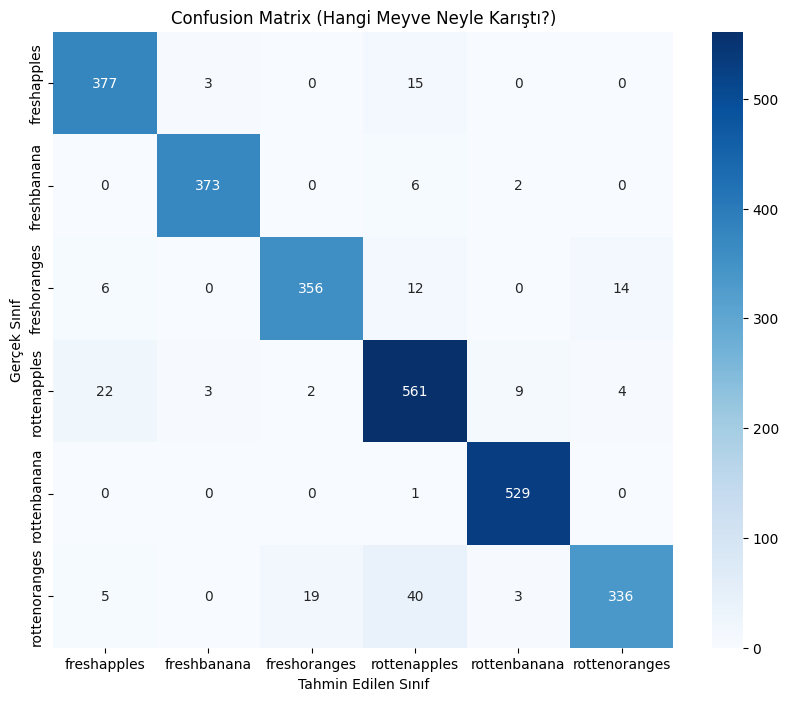


--- Sınıflandırma Raporu ---
               precision    recall  f1-score   support

  freshapples       0.92      0.95      0.94       395
  freshbanana       0.98      0.98      0.98       381
 freshoranges       0.94      0.92      0.93       388
 rottenapples       0.88      0.93      0.91       601
 rottenbanana       0.97      1.00      0.99       530
rottenoranges       0.95      0.83      0.89       403

     accuracy                           0.94      2698
    macro avg       0.94      0.94      0.94      2698
 weighted avg       0.94      0.94      0.94      2698



In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- 1. MODELİ VE VERİYİ YÜKLEME ---
print("Model yükleniyor...")
# Eğittiğimiz kayıtlı modeli geri çağırıyoruz
model = tf.keras.models.load_model('../models/fruit_cnn_model.h5')

test_dir = '../data/raw/test'
batch_size = 32
img_shape = (150, 150)

# Test verisi için generator (Shuffle=False ÇOK ÖNEMLİ, yoksa sıra karışır)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False 
)

# --- 2. TAHMİN YAPMA (PREDICTION) ---
print("Tahminler yapılıyor (Bu işlem biraz sürebilir)...")
Y_pred = model.predict(test_generator, test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1) # En yüksek olasılıklı sınıfı seç

# Gerçek etiketleri alalım
y_true = test_generator.classes

# Boyut eşitleme (Bazen son batch tam dolmaz, garantiye alalım)
y_pred = y_pred[:len(y_true)]

# Sınıf isimleri
class_names = list(test_generator.class_indices.keys())

# --- 3. CONFUSION MATRIX (KARMAŞIKLIK MATRİSİ) ---
print("\n--- Karmaşıklık Matrisi Oluşturuluyor ---")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Hangi Meyve Neyle Karıştı?)')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()

# --- 4. DETAYLI SINIFLANDIRMA RAPORU ---
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_true, y_pred, target_names=class_names))